# Assignment 11 - Artificial Neural Networks

## Initial Trial

Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5766 - loss: 1.4268 - val_accuracy: 0.8810 - val_loss: 0.4558
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8948 - loss: 0.3912 - val_accuracy: 0.9035 - val_loss: 0.3440
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9152 - loss: 0.3055 - val_accuracy: 0.9128 - val_loss: 0.3067
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9294 - loss: 0.2617 - val_accuracy: 0.9220 - val_loss: 0.2758
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9336 - loss: 0.2413 - val_accuracy: 0.9270 - val_loss: 0.2571
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9389 - loss: 0.2206 - val_accuracy: 0.9310 - val_loss: 0.2435
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9433 - loss: 0.2044 - val_accuracy: 0.9348 - val_loss: 0.2330
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9500 - loss: 0.1858 - val_accuracy: 0.

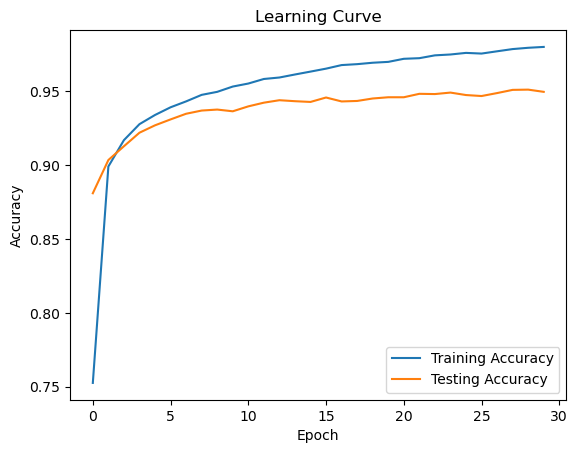

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.9832 - loss: 0.0692
Training Loss: 0.08666466176509857
Training Accuracy: 0.9769999980926514


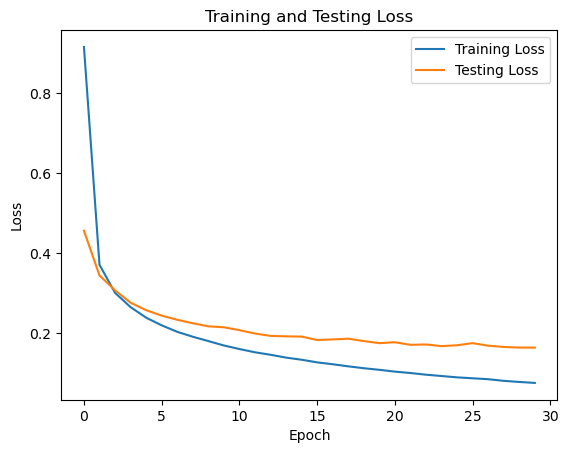

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step


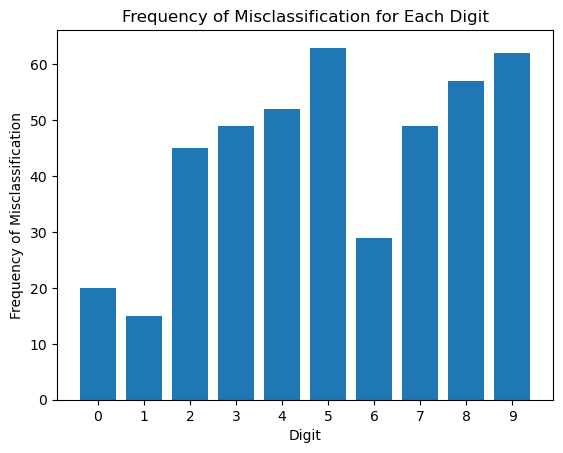

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Reshape the data to be in the format (num_samples, 28*28) 
# pictures of numbers are 28x28 pixels
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential()
model.add(Dense(30, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Number of sets for training
num_sets = 30

# Training the model
history = model.fit(X_train[:num_sets*1000], y_train[:num_sets*1000], epochs=30, batch_size=200, validation_split=0.2)
# epochs: number of times the entire dataset will be passed forward and backward through the neural network during training
# batch size: the number of samples that will be propagated through the network before the model's parameters are updated
# validation split: splits a fraction of the training data (20%) into a separate validation set

# Plot the learning curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.savefig('learning.png')
plt.show()

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_train[:num_sets*1000], y_train[:num_sets*1000])
print('Training Loss:', train_loss)
print('Training Accuracy:', train_acc)

# Plot training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


# Predict labels for the validation set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Find incorrectly classified digits
incorrect_indices = np.where(y_pred_labels != y_true_labels)[0]
incorrect_digits = y_true_labels[incorrect_indices]

# Count the frequency of incorrectly classified digits
incorrect_digit_counts = np.bincount(incorrect_digits)

# Plot the histogram of incorrectly classified digits
plt.figure()
plt.bar(range(10), incorrect_digit_counts)
plt.xlabel('Digit')
plt.ylabel('Frequency of Misclassification')
plt.title('Frequency of Misclassification for Each Digit')
plt.xticks(range(10))
plt.savefig('hist.png')
plt.show()


## Bigger Network

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7092 - loss: 1.0179 - val_accuracy: 0.9287 - val_loss: 0.2486
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9336 - loss: 0.2340 - val_accuracy: 0.9452 - val_loss: 0.1905
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.1784 - val_accuracy: 0.9553 - val_loss: 0.1614
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9587 - loss: 0.1448 - val_accuracy: 0.9586 - val_loss: 0.1469
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.1221 - val_accuracy: 0.9609 - val_loss: 0.1376
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.1067 - val_accuracy: 0.9622 - val_loss: 0.1326
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.0907 - val_accuracy: 0.9656 - val_loss: 0.1207
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0841 - val_accuracy: 0.

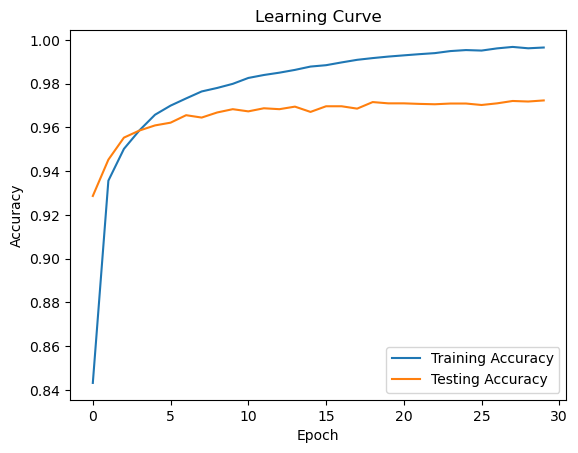

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.9972 - loss: 0.0126
Training Loss: 0.03500150144100189
Training Accuracy: 0.9926000237464905


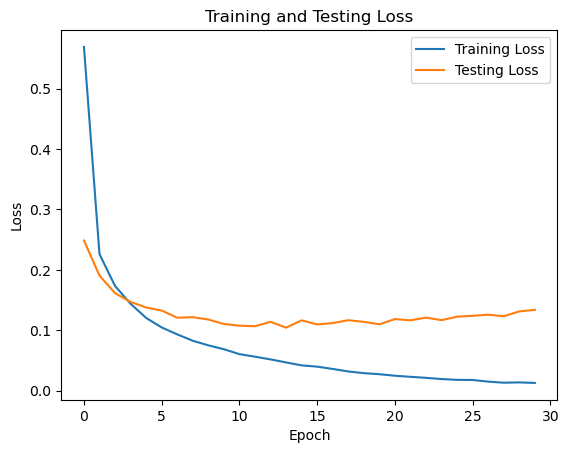

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step


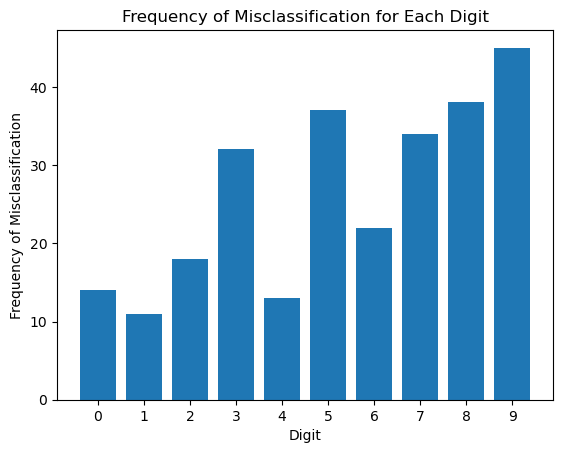

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Reshape the data to be in the format (num_samples, 28*28) 
# pictures of numbers are 28x28 pixels
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential()
num_hidden = 50
model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Number of sets for training
num_sets = 100

# Training the model
history = model.fit(X_train[:num_sets*1000], y_train[:num_sets*1000], epochs=30, batch_size=200, validation_split=0.2)
# epochs: number of times the entire dataset will be passed forward and backward through the neural network during training
# batch size: the number of samples that will be propagated through the network before the model's parameters are updated
# validation split: splits a fraction of the training data (20%) into a separate validation set

# Plot the learning curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.savefig('better_learning_relu.png')
plt.show()

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_train[:num_sets*1000], y_train[:num_sets*1000])
print('Training Loss:', train_loss)
print('Training Accuracy:', train_acc)

# Plot training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.savefig('better_loss_relu.png')
plt.show()


# Predict labels for the validation set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Find incorrectly classified digits
incorrect_indices = np.where(y_pred_labels != y_true_labels)[0]
incorrect_digits = y_true_labels[incorrect_indices]

# Count the frequency of incorrectly classified digits
incorrect_digit_counts = np.bincount(incorrect_digits)

# Plot the histogram of incorrectly classified digits
plt.figure()
plt.bar(range(10), incorrect_digit_counts)
plt.xlabel('Digit')
plt.ylabel('Frequency of Misclassification')
plt.title('Frequency of Misclassification for Each Digit')
plt.xticks(range(10))
plt.savefig('better_hist_relu.png')
plt.show()


## Bigger & Sigmoid

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5225 - loss: 1.9225 - val_accuracy: 0.8629 - val_loss: 0.7456
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8664 - loss: 0.6435 - val_accuracy: 0.9035 - val_loss: 0.3923
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9009 - loss: 0.3861 - val_accuracy: 0.9222 - val_loss: 0.2984
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9173 - loss: 0.3020 - val_accuracy: 0.9304 - val_loss: 0.2541
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9311 - loss: 0.2474 - val_accuracy: 0.9377 - val_loss: 0.2253
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9374 - loss: 0.2199 - val_accuracy: 0.9431 - val_loss: 0.2050
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9431 - loss: 0.1976 - val_accuracy: 0.9463 - val_loss: 0.1918
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9474 - loss: 0.1813 - val_accuracy: 0.

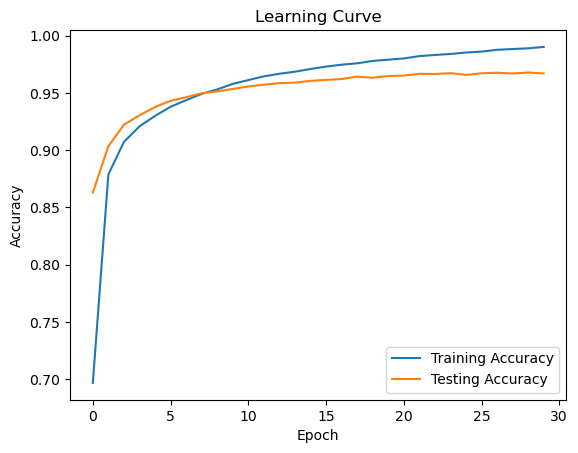

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.9908 - loss: 0.0393
Training Loss: 0.05369902029633522
Training Accuracy: 0.9860666394233704


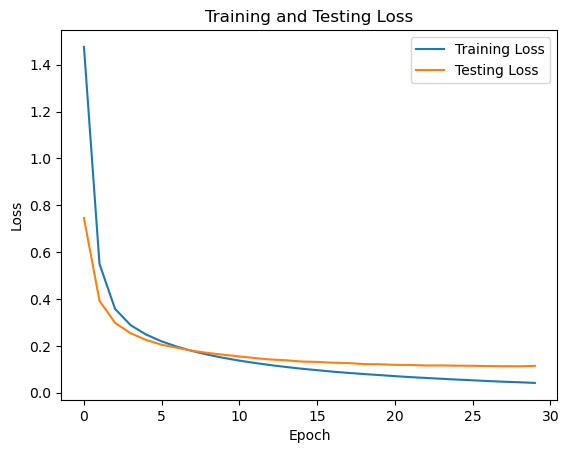

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step


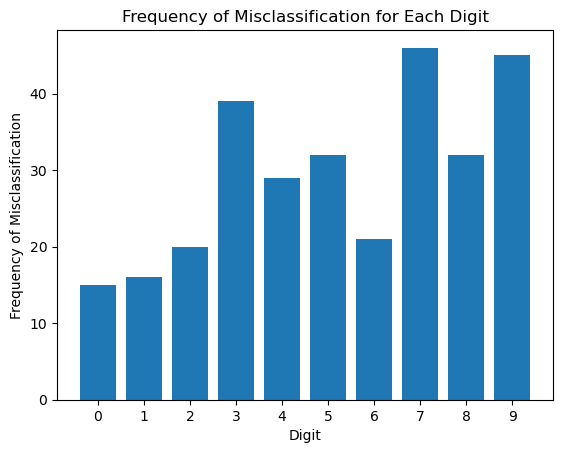

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Reshape the data to be in the format (num_samples, 28*28) 
# pictures of numbers are 28x28 pixels
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential()
num_hidden = 50
model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='sigmoid'))
model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Number of sets for training
num_sets = 100

# Training the model
history = model.fit(X_train[:num_sets*1000], y_train[:num_sets*1000], epochs=30, batch_size=200, validation_split=0.2)
# epochs: number of times the entire dataset will be passed forward and backward through the neural network during training
# batch size: the number of samples that will be propagated through the network before the model's parameters are updated
# validation split: splits a fraction of the training data (20%) into a separate validation set

# Plot the learning curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.savefig('better_learning_sigmoid.png')
plt.show()

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_train[:num_sets*1000], y_train[:num_sets*1000])
print('Training Loss:', train_loss)
print('Training Accuracy:', train_acc)

# Plot training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.savefig('better_loss_sigmoid.png')
plt.show()


# Predict labels for the validation set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Find incorrectly classified digits
incorrect_indices = np.where(y_pred_labels != y_true_labels)[0]
incorrect_digits = y_true_labels[incorrect_indices]

# Count the frequency of incorrectly classified digits
incorrect_digit_counts = np.bincount(incorrect_digits)

# Plot the histogram of incorrectly classified digits
plt.figure()
plt.bar(range(10), incorrect_digit_counts)
plt.xlabel('Digit')
plt.ylabel('Frequency of Misclassification')
plt.title('Frequency of Misclassification for Each Digit')
plt.xticks(range(10))
plt.savefig('better_hist_sigmoid.png')
plt.show()


## Bigger Network & Averages

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import time
from datetime import timedelta
start_time = time.monotonic()

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Reshape the data to be in the format (num_samples, 28*28) 
# pictures of numbers are 28x28 pixels
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential() # 2 hidden layers

num_hidden = 50 # number of hidden units in single hidden layer

model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='relu')) # two hidden layers added here
model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='relu'))

model.add(Dense(10, activation='softmax')) # output layer - size 10 because 10 digits 0-9

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Number of sets for training
num_sets = 100

# Training the model
cycles = 50

loss = np.array([])
accuracy = np.array([])

all_incorrect_digit_counts = []


for i in range(0, cycles+1):
    print(f"--------------Trial {i+1}/{cycles}--------------")
    history = model.fit(X_train[:num_sets*1000], y_train[:num_sets*1000], epochs=30, batch_size=200, validation_split=0.2)
# epochs: number of times the entire dataset will be passed forward and backward through the neural network during training
# batch size: the number of samples that will be propagated through the network before the model's parameters are updated
# validation split: splits a fraction of the training data (20%) into a separate validation set in order 
#                                                                  to keep track of loss and accuracy

    train_loss, train_acc = model.evaluate(X_train[:num_sets*1000], y_train[:num_sets*1000])
    
    loss = np.append(loss, train_loss)
    accuracy = np.append(accuracy, train_acc)
    
        # Predict labels for the validation set
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    # Find incorrectly classified digits
    incorrect_indices = np.where(y_pred_labels != y_true_labels)[0]
    incorrect_digits = y_true_labels[incorrect_indices]

    # Count the frequency of incorrectly classified digits
    incorrect_digit_counts = np.bincount(incorrect_digits)
    
    counts = incorrect_digit_counts
    all_incorrect_digit_counts.append(counts)
    print("-------------------------------------------------")
    
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))   

--------------Trial 1/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7192 - loss: 1.0265 - val_accuracy: 0.9321 - val_loss: 0.2436
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9308 - loss: 0.2356 - val_accuracy: 0.9448 - val_loss: 0.1912
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.1751 - val_accuracy: 0.9532 - val_loss: 0.1610
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9599 - loss: 0.1358 - val_accuracy: 0.9571 - val_loss: 0.1448
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9645 - loss: 0.1209 - val_accuracy: 0.9613 - val_loss: 0.1319
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9702 - loss: 0.0992 - val_accuracy: 0.9653 - val_loss: 0.1257
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9735 - loss: 0.0877 - val_accuracy: 0.9659 - val_loss: 0.1137
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

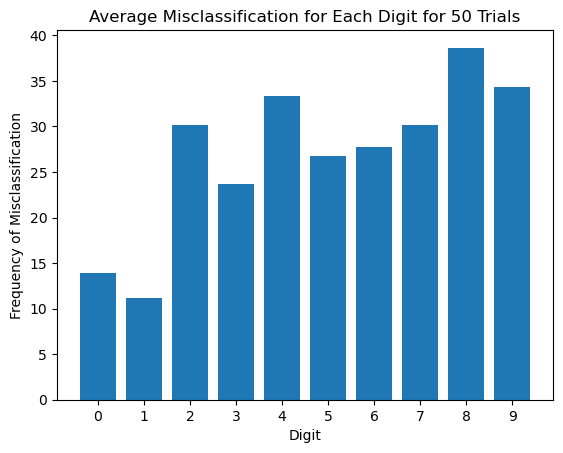

In [99]:

avg_loss = np.average(loss) # average final loss over all trials
avg_accuracy = np.average(accuracy) # avg final accuracy over all trials

incorrects_array = np.asarray(all_incorrect_digit_counts) # 

averages = np.array([])

for i in range(0, 10):
    avg = np.average(incorrects_array[0:, i])
    
    averages = np.append(averages, avg)



# Plot the histogram of incorrectly classified digits
plt.figure()
plt.bar(range(10), averages)
plt.xlabel('Digit')
plt.ylabel('Frequency of Misclassification')
plt.title(f'Average Misclassification for Each Digit for {cycles} Trials')
plt.xticks(range(10))
plt.savefig('avg_incorrect_relu.png')
plt.show()

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import time
from datetime import timedelta
start_time = time.monotonic()

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Reshape the data to be in the format (num_samples, 28*28) 
# pictures of numbers are 28x28 pixels
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential() # 2 hidden layers

num_hidden = 50 # number of hidden neurons in single hidden layer

model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='sigmoid')) # two hidden layers added here
model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='sigmoid'))

model.add(Dense(10, activation='softmax')) # output layer - size 10 because 10 digits 0-9

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Number of sets for training
num_sets = 100

# Training the model
cycles = 50

loss = np.array([])
accuracy = np.array([])

all_incorrect_digit_counts = []


for i in range(0, cycles+1):
    print(f"--------------Trial {i+1}/{cycles}--------------")
    history = model.fit(X_train[:num_sets*1000], y_train[:num_sets*1000], epochs=30, batch_size=200, validation_split=0.2)
# epochs: number of times the entire dataset will be passed forward and backward through the neural network during training
# batch size: the number of samples that will be propagated through the network before the model's parameters are updated
# validation split: splits a fraction of the training data (20%) into a separate validation set in order 
#                                                                  to keep track of loss and accuracy

    train_loss, train_acc = model.evaluate(X_train[:num_sets*1000], y_train[:num_sets*1000])
    
    loss = np.append(loss, train_loss)
    accuracy = np.append(accuracy, train_acc)
    
        # Predict labels for the validation set
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    # Find incorrectly classified digits
    incorrect_indices = np.where(y_pred_labels != y_true_labels)[0]
    incorrect_digits = y_true_labels[incorrect_indices]

    # Count the frequency of incorrectly classified digits
    incorrect_digit_counts = np.bincount(incorrect_digits)
    
    counts = incorrect_digit_counts
    all_incorrect_digit_counts.append(counts)
    print("-------------------------------------------------")
    
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))   

--------------Trial 1/50--------------
Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4980 - loss: 1.8526 - val_accuracy: 0.8660 - val_loss: 0.7401
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8754 - loss: 0.6312 - val_accuracy: 0.9082 - val_loss: 0.3887
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9066 - loss: 0.3754 - val_accuracy: 0.9233 - val_loss: 0.2940
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9222 - loss: 0.2929 - val_accuracy: 0.9312 - val_loss: 0.2537
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9315 - loss: 0.2462 - val_accuracy: 0.9376 - val_loss: 0.2243
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9398 - loss: 0.2156 - val_accuracy: 0.9438 - val_loss: 0.2036
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9467 - loss: 0.1908 - val_accuracy: 0.9466 - val_loss: 0.1870
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

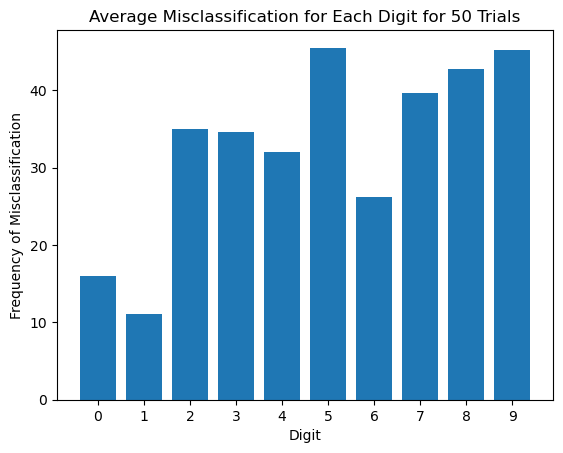

In [101]:

avg_loss = np.average(loss) # average final loss over all trials
avg_accuracy = np.average(accuracy) # avg final accuracy over all trials

incorrects_array = np.asarray(all_incorrect_digit_counts) # 

averages = np.array([])

for i in range(0, 10):
    avg = np.average(incorrects_array[0:, i])
    
    averages = np.append(averages, avg)



# Plot the histogram of incorrectly classified digits
plt.figure()
plt.bar(range(10), averages)
plt.xlabel('Digit')
plt.ylabel('Frequency of Misclassification')
plt.title(f'Average Misclassification for Each Digit for {cycles} Trials')
plt.xticks(range(10))
plt.savefig('avg_incorrect_sigmoid.png')
plt.show()